In [42]:
%matplotlib inline
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import sklearn
from sklearn.datasets import load_boston

In [43]:
boston=load_boston()

In [44]:
boston.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR'])

In [45]:
boston['data'].shape

(506, 13)

In [46]:
boston['target'].shape

(506,)

In [47]:
boston['target']=np.reshape(boston['target'],(506,1))

In [48]:
boston['target'].shape

(506, 1)

In [49]:
boston['target'].dtype

dtype('float64')

In [50]:
X=boston['data']
Y=boston['target']

In [51]:
from sklearn import cross_validation
X_train, X_test, Y_train, Y_test = sklearn.cross_validation.train_test_split(X, Y, test_size = 0.3, random_state = 5)
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(354, 13)
(152, 13)
(354, 1)
(152, 1)


In [52]:
X1=tf.placeholder(tf.float64,shape=[None,13])
X1

<tf.Tensor 'Placeholder_4:0' shape=(?, 13) dtype=float64>

In [53]:
Y1=tf.placeholder(tf.float64,shape=[None,1])
Y1

<tf.Tensor 'Placeholder_5:0' shape=(?, 1) dtype=float64>

In [54]:
W1=tf.Variable(tf.constant(0.1,shape=[13,1],dtype=tf.float64))
W1

<tf.Variable 'Variable_4:0' shape=(13, 1) dtype=float64_ref>

In [55]:
b1=tf.Variable(tf.constant(0.1,dtype=tf.float64))
b1

<tf.Variable 'Variable_5:0' shape=() dtype=float64_ref>

In [56]:
Y_pred=tf.matmul(X1,W1)+b1
Y_pred

<tf.Tensor 'add_2:0' shape=(?, 1) dtype=float64>

In [57]:
loss=tf.reduce_mean(tf.square(Y_pred-Y1))
loss

<tf.Tensor 'Mean_2:0' shape=() dtype=float64>

In [99]:
opt=tf.train.GradientDescentOptimizer(learning_rate=0.000001).minimize(loss)
opt

<tf.Operation 'GradientDescent_11' type=NoOp>

In [100]:
init=tf.global_variables_initializer()
sess=tf.InteractiveSession()
sess.run(init)

In [101]:
initial_loss=loss.eval(feed_dict={X1:X_train,Y1:Y_train})
initial_loss

5190.745052304911

In [102]:
print('initial_loss:{}'.format(initial_loss))

initial_loss:5190.745052304911


In [103]:
for i in range(5000):
    sess.run(opt,feed_dict={X1:X_train,Y1:Y_train})
    if i%100==0:
        print("current_loss:{}".format(loss.eval(feed_dict={X1:X_train,Y1:Y_train})))

current_loss:837.0480272750477
current_loss:78.63472474138213
current_loss:77.04217980666851
current_loss:75.79164941363715
current_loss:74.78708790150918
current_loss:73.96079346422405
current_loss:73.26411151081531
current_loss:72.66206874866543
current_loss:72.12951911607587
current_loss:71.64837554468262
current_loss:71.205621631864
current_loss:70.79188349268304
current_loss:70.40040396742543
current_loss:70.02630582586602
current_loss:69.66606254694656
current_loss:69.31711819205987
current_loss:68.97761436670545
current_loss:68.64619409976794
current_loss:68.32186096992547
current_loss:68.00387791410277
current_loss:67.69169453816232
current_loss:67.38489489980526
current_loss:67.08315999601712
current_loss:66.78624081236327
current_loss:66.49393895859215
current_loss:66.20609275332495
current_loss:65.92256722274567
current_loss:65.64324691069415
current_loss:65.36803070820677
current_loss:65.09682813366996
current_loss:64.82955665501238
current_loss:64.56613976046977
current_lo

In [114]:
data,targets=X_test,Y_test
predictions=sess.run(Y_pred,feed_dict={X1:data})
predictions=predictions.flatten()
targets=targets.reshape((152))

for i in range(10):
    randint=np.random.randint(0,152)
    print(randint)
    pred=predictions[randint]
    actual=targets[randint]
    print("prediction is :{}  and   actual is :{}".format(pred,actual))

29
prediction is :28.860983115217884  and   actual is :24.1
146
prediction is :25.037511416786064  and   actual is :24.0
38
prediction is :26.231755948207283  and   actual is :48.8
113
prediction is :29.824840390575073  and   actual is :30.3
121
prediction is :28.664806555187983  and   actual is :33.4
41
prediction is :20.72618988145514  and   actual is :14.4
55
prediction is :33.61650125562226  and   actual is :24.7
145
prediction is :20.917141827782064  and   actual is :50.0
77
prediction is :19.42613305018883  and   actual is :15.4
44
prediction is :22.650902980500973  and   actual is :27.1


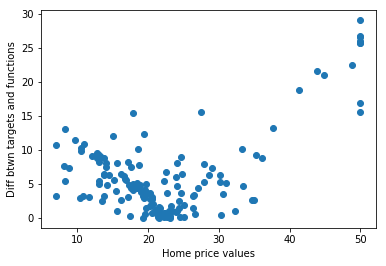

average absolute difference: 6052.978556703457
average house price: 22478.28947368421


In [115]:
diffs = abs(targets - predictions)
avg_diffs = np.mean(diffs)
avg_houseprice = np.mean(targets)
plt.xlabel('Home price values')
plt.ylabel('Diff btwn targets and functions')
plt.scatter(targets, diffs)
plt.show()
print("average absolute difference: {}".format(avg_diffs * 1000))
print("average house price: {}".format(avg_houseprice * 1000))

In [116]:
price_buckets = [0, 10, 20, 30, 40, 50]
limits = dict(zip(price_buckets, [0  for _ in range(len(price_buckets))]))
print(limits)
for price in targets:
    limits[int(price/10) * 10]+=1

for k, v in sorted(limits.items()):
    print("{} : {}".format(k, v))

{0: 0, 10: 0, 20: 0, 30: 0, 40: 0, 50: 0}
0 : 7
10 : 62
20 : 58
30 : 13
40 : 4
50 : 8
